# K Nearest Neighbor
## A movie-ing target

## Friend inventory
### Use handout

![bullseye3](./img/bullseye2.png)

## Friend Inventory
### What would each person choose?

![movies](./img/movies.png)

## Friend Inventory
### Decision majority by ring

If you just polled the inner ring of people, what movie would you end up seeing?
- How about if you polled the first *and* second ring?
- The first three rings?
- All of it?

Share with your neighbor what movie you'd end up seeing.

## Friend Inventory
### What did you end up seeing?

Who's movie choices changed based on how many people you polled?
![movies](./img/movies.png)



## Friend Inventory
### What's the "algorithm" we used for this process, in normal words?

### How does this relate to K nearest neighbor(knn)?

![annotate](./img/bullseye-annotate.png)

# Scenario

We are going to revisit the pima native Americans diabetes dataset. Can we use knn to classify people correctly and then predict if someone will have diabetes?

![](./img/diabetes.png)

# Implementing a K-Nearest Neighbors Model

## Objective: 
By the end of class students will be able to:
- Understand how the KNN model predicts the class of new data
- Implement a KNN classification model using scikit learn
- Select the best k value
- Understand the strengths and weaknesses of KNN

## K-nearest neighbors (KNN) classification

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?

### What should the grey point be?

<img src='./img/scenario.png' width=500/>

## KNN has the following basic steps:

<img src='./img/knn-process.png' width=700/>

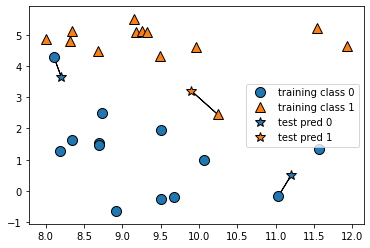

In [1]:
import warnings
warnings.filterwarnings('ignore')
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

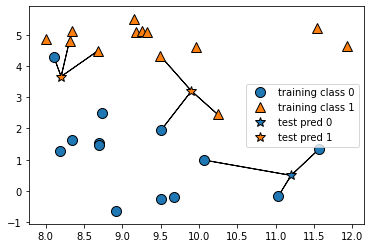

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

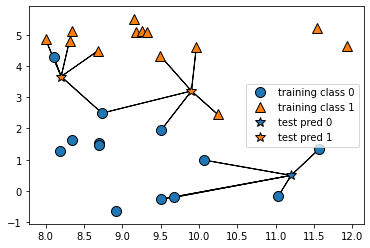

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

### Voting

How to break ties:

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

With a 2D dataset we can visualize how KNN creates a **decision boundary** where the algorithm divides the data between the two classes.

![](./img/decision_bound.png)

With an k of 1 we can see that our decision boundary closely follows our training data but as we increase our value of k the decision boundary gets smoother.

## A bit more math

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](./img/euclidean-distance.png)

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](img/vectorgraph.jpg)

## Implementing the KNN Classifier with SKlearn

## Reviewing the Pima dataset

## Loading the data


[following this analysis for part of this section](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

The Question creeping out of this summary
- Can minimum value of below listed columns be zero (0)?
- On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [4]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#creating X and y
y=diabetes['Outcome']
X=diabetes.drop(columns=['Outcome'])

In [6]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [7]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


<img src='./img/nonnormal.png' width=500/>

<img src='./img/normalized.png' width=500/>

#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

## scikit-learn 4-step modeling pattern

![steps](img/sklearnsteps.png)

**Step 1:** Import the class you plan to use

In [9]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

**Class specifications**
- Name of the object does not matter
- Can specify tuning hyperparameters during this step
- All hyperparameters not specified are set to their defaults

In [11]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


Note the default `metric` here is `'minkoski'`. This is the default hyperparameter, and with `p=2` it is equivalent to the standard Euclidean metric.

**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [13]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [14]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.6979166666666666
F1: 0.546875


In [15]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)


ModuleNotFoundError: No module named 'yellowbrick'

## Using a different value for K

In [ ]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [ ]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

In [16]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)



ModuleNotFoundError: No module named 'yellowbrick'

#### Search for an optimal value of K for KNN


In [17]:
k_range = list(range(1, 6))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6920166015625, 0.6460241759242397, 0.7272287644787645, 0.7038736934980317, 0.78759765625]


#### Visual comparison of different $K$s

This is not an ROC curve

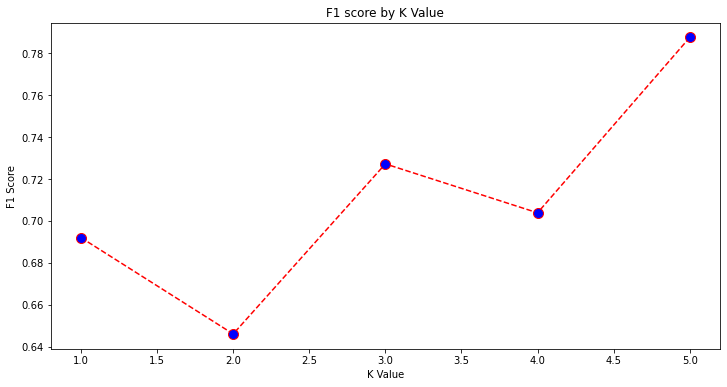

In [18]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of K performs best on our Test data?

Here we use F1 score, what other metrics could we use?

### How do you think K size relates to our concepts of bias and variance?

![alt text](img/K-NN_Neighborhood_Size_print.png)

# KNN Strengths 

- Easy to understand
- Gives reasonable performance without a lot of "tuning"
- Building the model is fast (`fit` step just stores values)

# KNN Weaknesses

- Prediction can be slow when your training set is large in size or in features.
- Does not do well with large data
- Does not perform well on sparse datasets (when there are a lot of values of 0)

# Important Parameters 

- k, the number of neighbors
- distance metric


## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [KNN StatsQuest](https://youtu.be/HVXime0nQeI)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)